# ColorMap
One of the most reoccuring tasks is to apply a colormap to a set of values. In order to simplify this as much as possible, PyMolViz has implemented an auxiliary ColorMap class which automatically tries to gracefully interpret different types of input:

**Single Color Input**
Sometimes instead of a color for every point / line / mesh, you just want a single color (this is in fact the default if no color is passed). For this the colormap can be passed only a single color and will assign this color to any value that is passed to it.
Single Color Inputs can be:
* A colors name
* An elements name (which then gets converted based on pymols element colors)
* An array-like with 3 or 4 entries as rgb (a), either indicating values as float between 0 and 1 or as integer between 0 and 255.

**Multiple Color Input**
The more interesting case is if you want to assing different colors to different values. For this the ColorMap class can infer the colormap scaling from a set of values passed to it. In this case the passed *colormap* keyword is used to infer the colormaps colors. Alternatively if a list of single colors (see above) is passed to it, it will map each index to the corresponding color.
Multiple Color Inputs can be:
* An array-like containing float-like values (colors are taken from a matplotlib colormap corresponding to the passed *colormap* argument. Defaults to *"RdYlBu_r"*.)
* An array-like containing single colors (see above)

**Linear Segmented Color Input**
If you want to assign certain colors to certain values, you can pass a list of tuples to the ColorMap, with each tuple (value, color) containing the value and the corresponding single color (see above).
Alternatively tuples of (value, color_value) pairs can be passed. In this case color_value may be a float between 0 and 1 or an integer between 0 and 255 indicating the color based on the passed *colormap* keyword.
Linear Segmented Color Inputs can be:
* An array-like containing tuples of (float-like, single color (see above)).
* An array-like containing tupes of (float-like, color-indicator) with color-indicator being a float between 0 and 1. The colors are then determined by passing the color-indicator to the matplotlib colormap corresponding to the passed *colormap* argument (Defaults to *"RdYlBu_r"*).


## Setup & Imports

In [1]:
import numpy as np
import pymolviz as pmv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 1]

In order to get some idea of how the colormap performs, we define a function which plots given points with the color assigned by the colormap. Additionally the function shows the colorbar associated with the colormap.

In [2]:
def plot_colors(cmap, x):
    # plotting random points
    print(f"{x=}")
    test_colors = cmap.get_color(x)
    print("\n\nColored points:")
    plt.scatter(x, np.full_like(x, 0.5), color = test_colors)
    plt.show()

    #plotting the colorbar
    print("Colorbar:")
    cmap.get_figure(orientation = "horizontal", figsize=(10, 1))

## Single Color Inputs
First we will test the single color inputs.
In order to test them, we create the colormap and then pass 10 random values and plot the values with the assigned colors.

#### Color Name
For a test we pass "red" as a color name.

x=array([8.08955257, 9.02888528, 0.93503253, 5.43011553, 8.69951532,
       0.18624034, 2.14978354, 5.64377083, 1.40784617, 7.48077865])


Colored points:


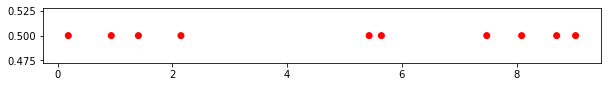

Colorbar:


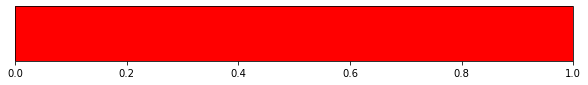

In [3]:
cmap = pmv.ColorMap("red")
plot_colors(cmap, np.random.rand(10) * 10)
    

#### Element Name
For a test we pass "I" as an element name.

x=array([6.96772153, 6.35995877, 6.44622232, 6.88395151, 5.62012751,
       4.88302066, 4.3785902 , 6.53738566, 3.27735029, 5.02505848])


Colored points:


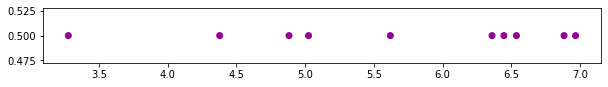

Colorbar:


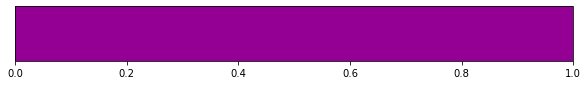

In [4]:
cmap = pmv.ColorMap("I")
plot_colors(cmap, np.random.rand(10) * 10)

#### Single RGB(A) Values
As examples we pass (0.1, 0.9, 0.5), (105, 55, 10), and (0.4, 1, 0.9, 0.6).

#### **Disambiguation between rgba values and multiple color input with color inference from values.**
In rare cases you might want to pass 3 or 4 values not as a color but as values to infer a color from. While the ColorMap class defaults to the single color case, it is best to differentiate here with the *values_are_single_color* keyword.

x=array([1.51935399, 7.77082271, 1.8933233 , 5.91752981, 4.02965439,
       8.00207649, 0.02533428, 6.79061285, 6.36508121, 7.92262765])


Colored points:


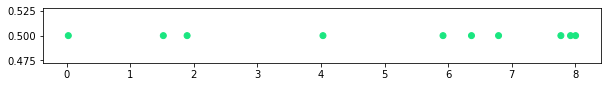

Colorbar:


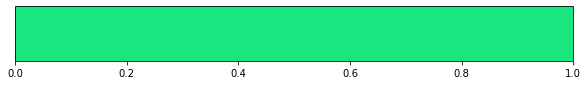

In [5]:
cmap = pmv.ColorMap([0.1, 0.9, 0.5])
plot_colors(cmap, np.random.rand(10) * 10)

x=array([6.97131937, 6.53245086, 7.22312011, 9.92424677, 6.49444456,
       4.31467658, 6.60075301, 6.14796038, 7.58774906, 8.14090452])


Colored points:


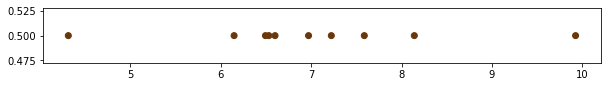

Colorbar:


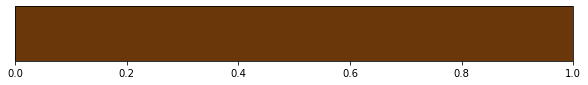

In [6]:
cmap = pmv.ColorMap([105, 55, 10], values_are_single_color=True)
plot_colors(cmap, np.random.rand(10) * 10)

x=array([8.58239118, 2.66262292, 8.48238226, 0.49946202, 2.59485895,
       4.33969764, 1.66607084, 3.09241306, 9.44481898, 8.01550113])


Colored points:


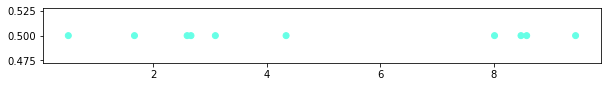

Colorbar:


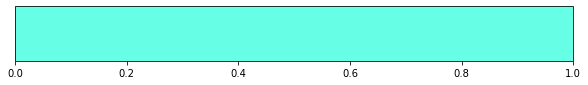

In [7]:
cmap = pmv.ColorMap((0.4, 1, 0.9, 0.6), values_are_single_color=True)
plot_colors(cmap, np.random.rand(10) * 10)

## Multi Color Inputs
Next we will test the multi-color inputs.
In order to test them, we create the colormap and then pass 10 random values and plot the values with the assigned colors.

#### Color Inference from values
In the following examples colors are inferred from passed values. Note that in this case the colormap argument is important. Additionally, only the minimum and maximum values of the passed value actually have an impact on the colormap.

x=array([7.19289214, 7.7695452 , 8.51122868, 2.04435477, 8.21874454,
       6.6438358 , 9.09959673, 1.73929193, 6.65281986, 6.85818567])


Colored points:


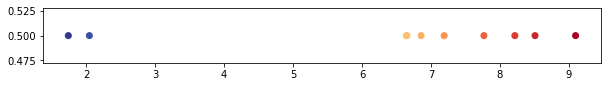

Colorbar:


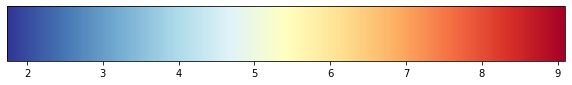

In [8]:
values = np.random.rand(10) * 10
cmap = pmv.ColorMap(values)
plot_colors(cmap, values)

x=array([5.65061631, 3.94970171, 8.85824366, 2.35764404, 6.71135297,
       5.28310476, 4.30185184, 5.61990101, 4.63138672, 1.87215889])


Colored points:


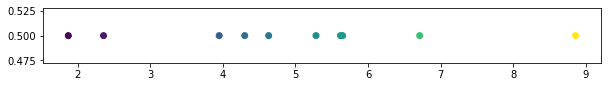

Colorbar:


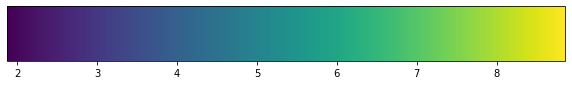

In [9]:
values = np.random.rand(10) * 10
cmap = pmv.ColorMap(values, colormap="viridis")
plot_colors(cmap, values)

#### **Disambiguation between rgba values and multiple color input with color inference from values.**
In rare cases you might want to pass 3 or 4 values not as a color but as values to infer a color from. While the ColorMap class defaults to the single color case, it is best to differentiate here with the *values_are_single_color* keyword.

===== Without values_are_single_color =====
x=array([0.11849376, 0.22282602, 0.49903908])


Colored points:


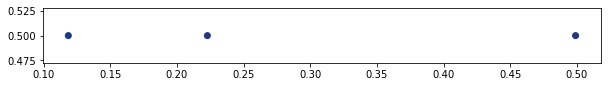

Colorbar:


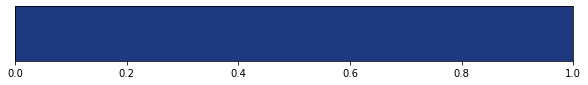

In [10]:
values = np.random.rand(3)
print("===== Without values_are_single_color =====")
cmap = pmv.ColorMap(values, colormap="viridis")
plot_colors(cmap, values)


===== With values_are_single_color =====
x=array([0.11849376, 0.22282602, 0.49903908])


Colored points:


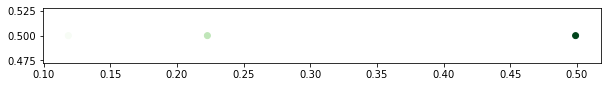

Colorbar:


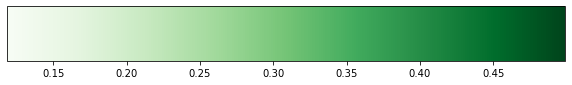

In [11]:
print("===== With values_are_single_color =====")
cmap = pmv.ColorMap(values, colormap="Greens", values_are_single_color=False)
plot_colors(cmap, values)

#### Multiple Colors
Instead of passing values you can also pass mutiple single colors. As an example we will pass ["red", "I", [0.3, 0.4, 0.7], [50, 200, 100]]. Each of the indices are then mapped to the color.

x=range(0, 4)


Colored points:


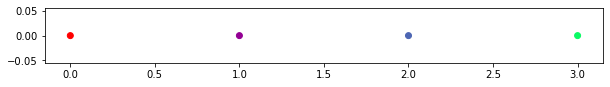

Colorbar:


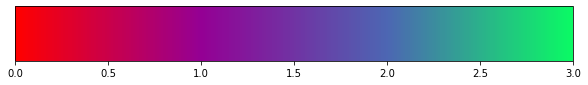

In [12]:
cmap = pmv.ColorMap(["red", "I", [0.3, 0.4, 0.7], [10, 250, 100]])
plot_colors(cmap, range(4))

## Linear Segmented Color Inputs
Finally we will show linear segmented color inputs. In this case the colormap is constructed by mapping the given values to the given colors and linearly interpolating for any value inbetween.

#### Value - Color pairs
As an input we use [(0.1, (50, 10, 255)), (0.5, "Br"), (0.6, "Cl"), (2, "black")].

x=[0.1, 0.5, 0.6, 2]


Colored points:


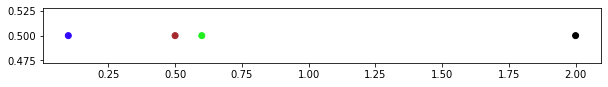

Colorbar:


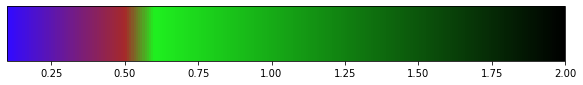

In [13]:
values = [0.1, 0.5, 0.6, 2]
colors = [(50, 10, 255), "Br", "Cl", "black"]
cmap = pmv.ColorMap(list(zip(values, colors)))
plot_colors(cmap, values)

#### Value - Value pairs
As input we use [(0, 0), (0.5, 0.3), (0.51, 0.7), (1, 1)]

x=[-2, 0, 0, 3]


Colored points:


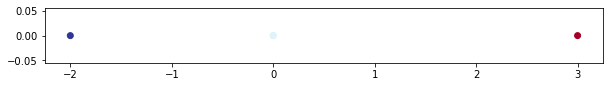

Colorbar:


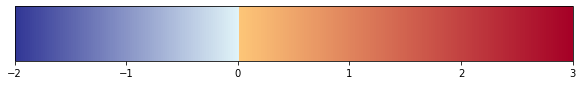

In [14]:
values = [-2, 0, 0, 3]
color_values = [0, 0.4, 0.65, 1]
cmap = pmv.ColorMap(list(zip(values, color_values)))
plot_colors(cmap, values)